In [22]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import shapiro, kstest, normaltest,skew

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('Cellphone.csv')
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [24]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [25]:
column_mapping={
    'cpu core':'cpu_core',
    'cpu freq':'cpu_freq',
    'internal mem':'internal_mem'
}
df.rename(columns=column_mapping, inplace= True)
print(df.head())

   Product_id  Price  Sale  weight  resoloution  ppi  cpu_core  cpu_freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal_mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  


In [26]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu_core', 'cpu_freq', 'internal_mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [27]:
df


,Product_id,Price,Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu_core      161 non-null    int64  
 7   cpu_freq      161 non-null    float64
 8   internal_mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [29]:
df.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu_core        0
cpu_freq        0
internal_mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

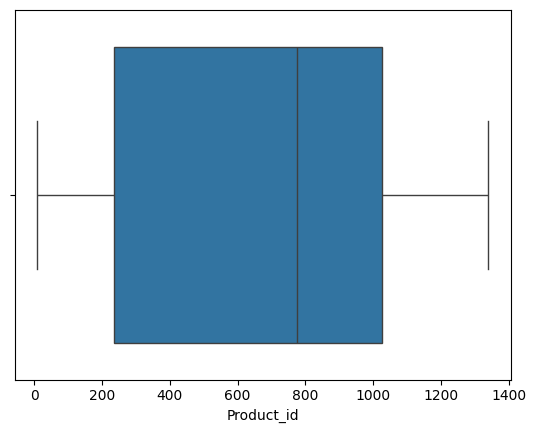

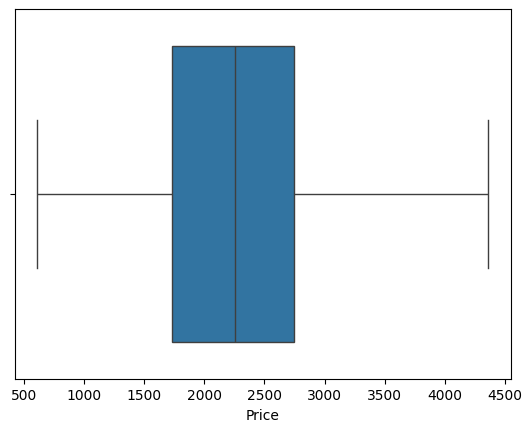

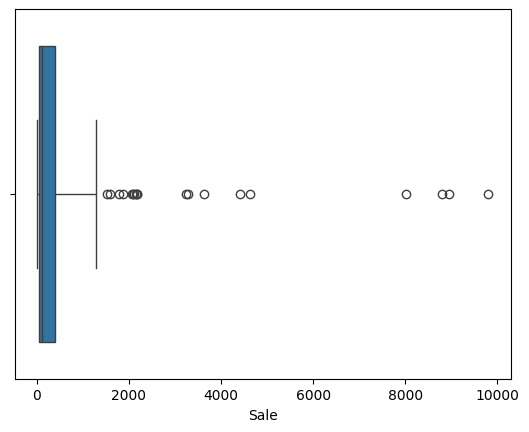

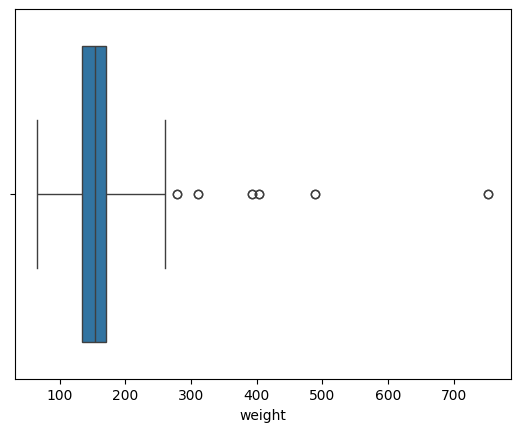

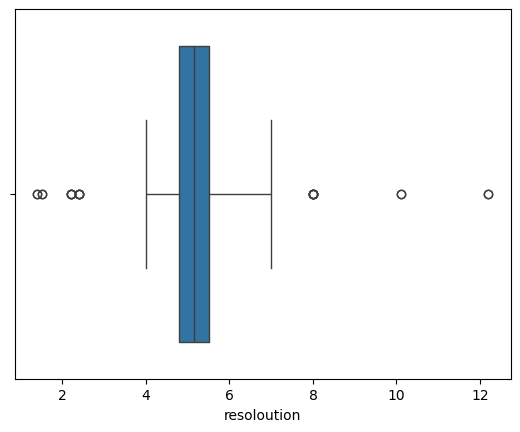

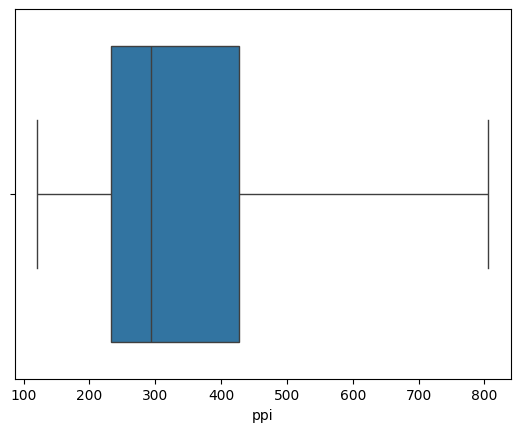

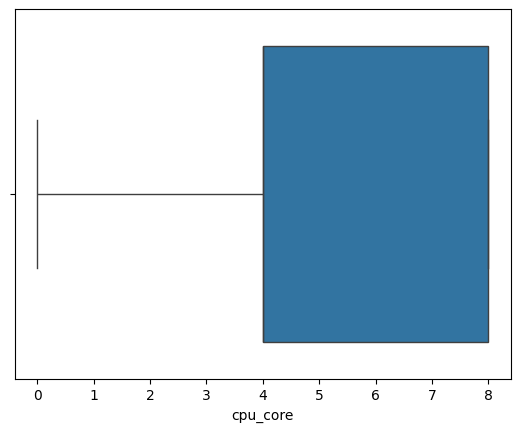

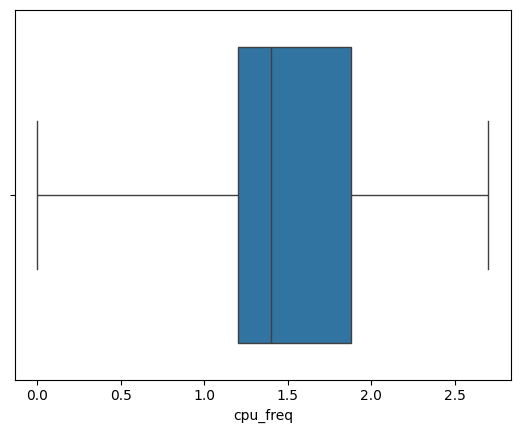

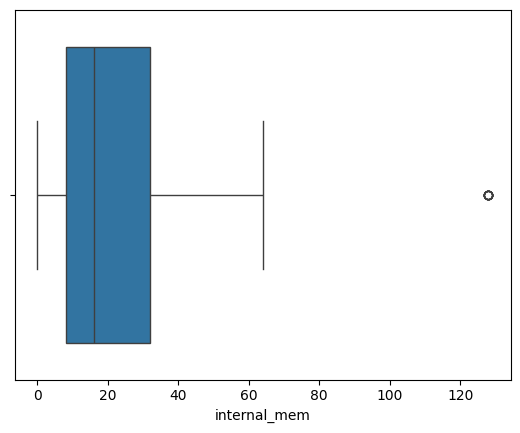

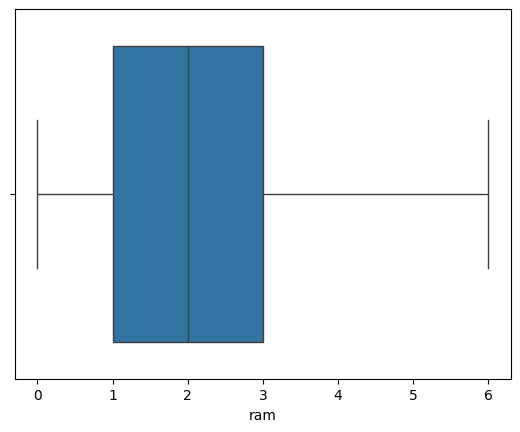

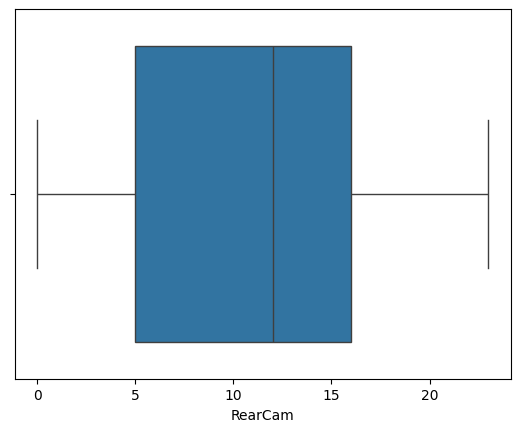

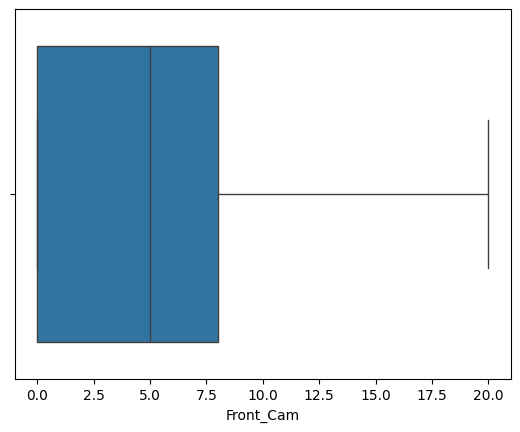

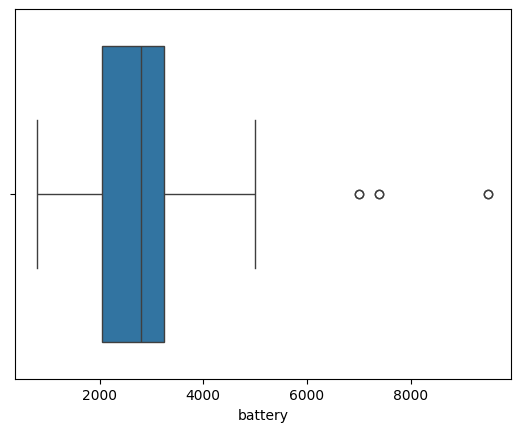

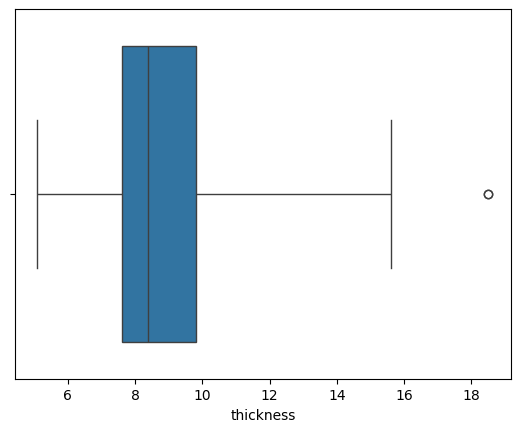

In [30]:
df1=df.select_dtypes(exclude=object)
df1.head()
for i in df1.columns:
    sns.boxplot(x=df1[i],whis=3)
    plt.show()

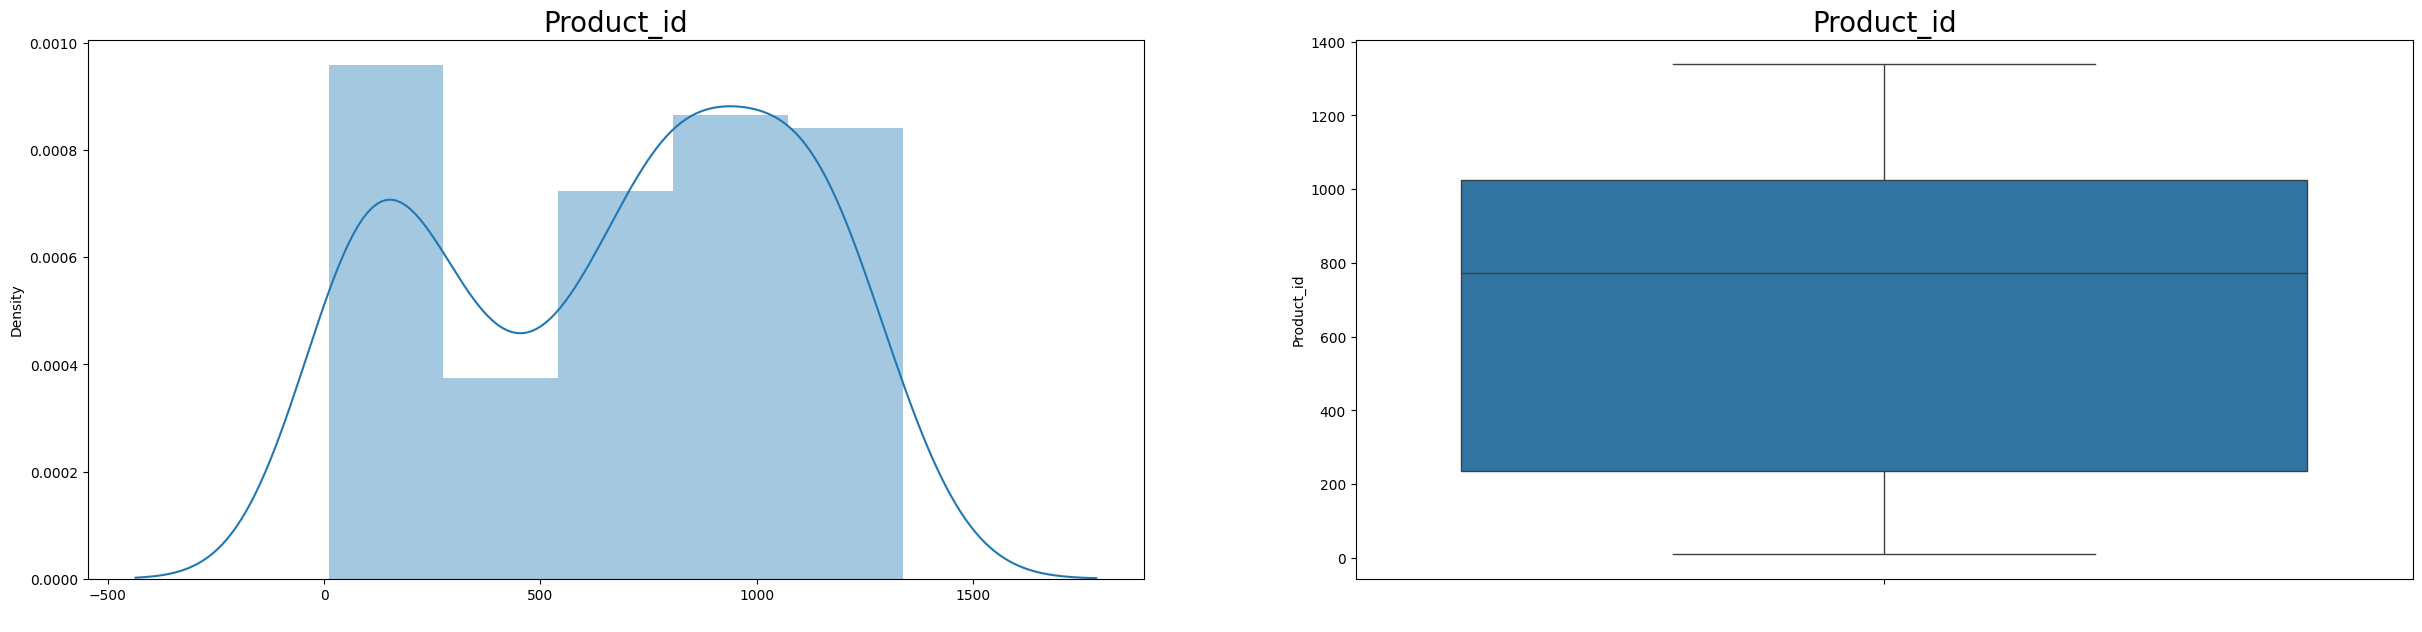

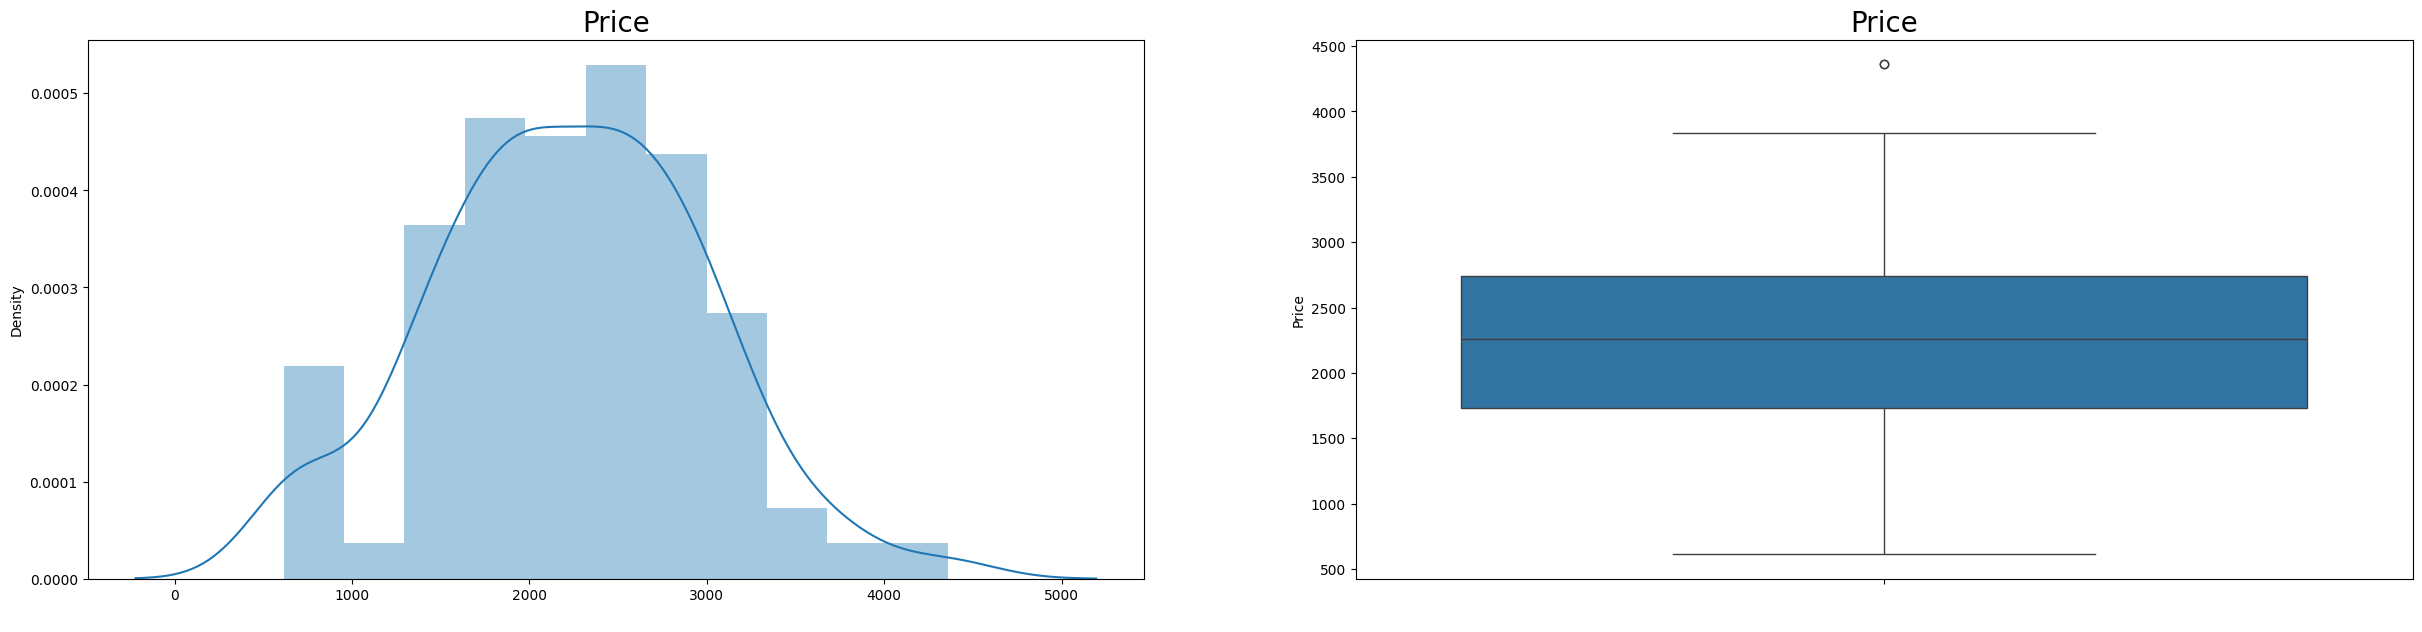

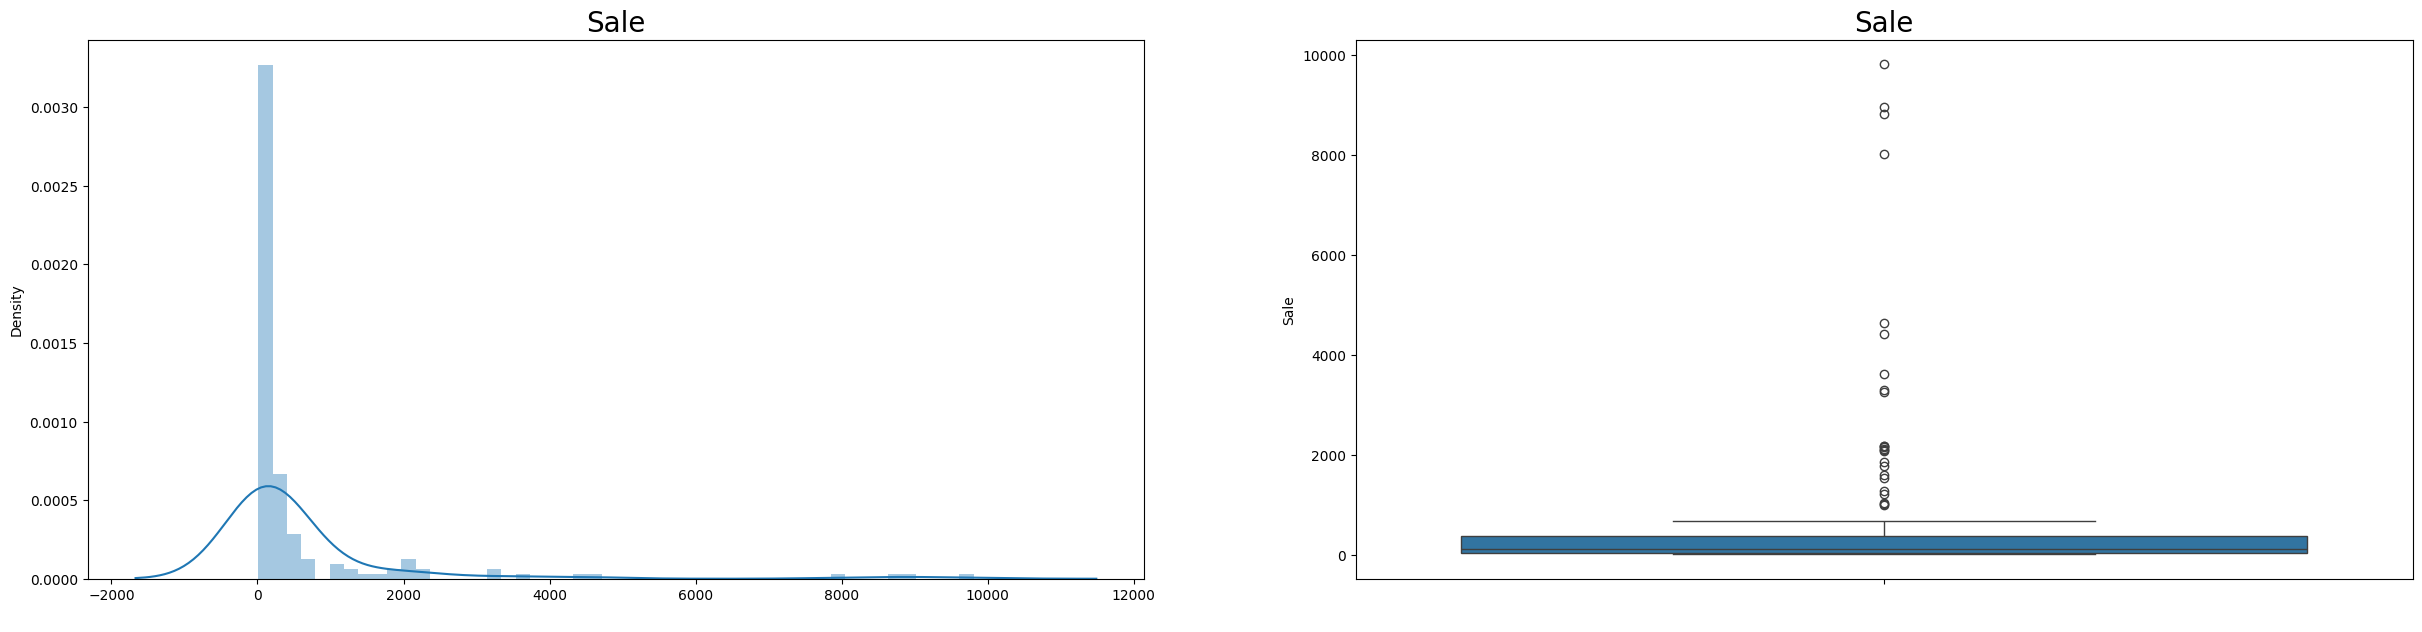

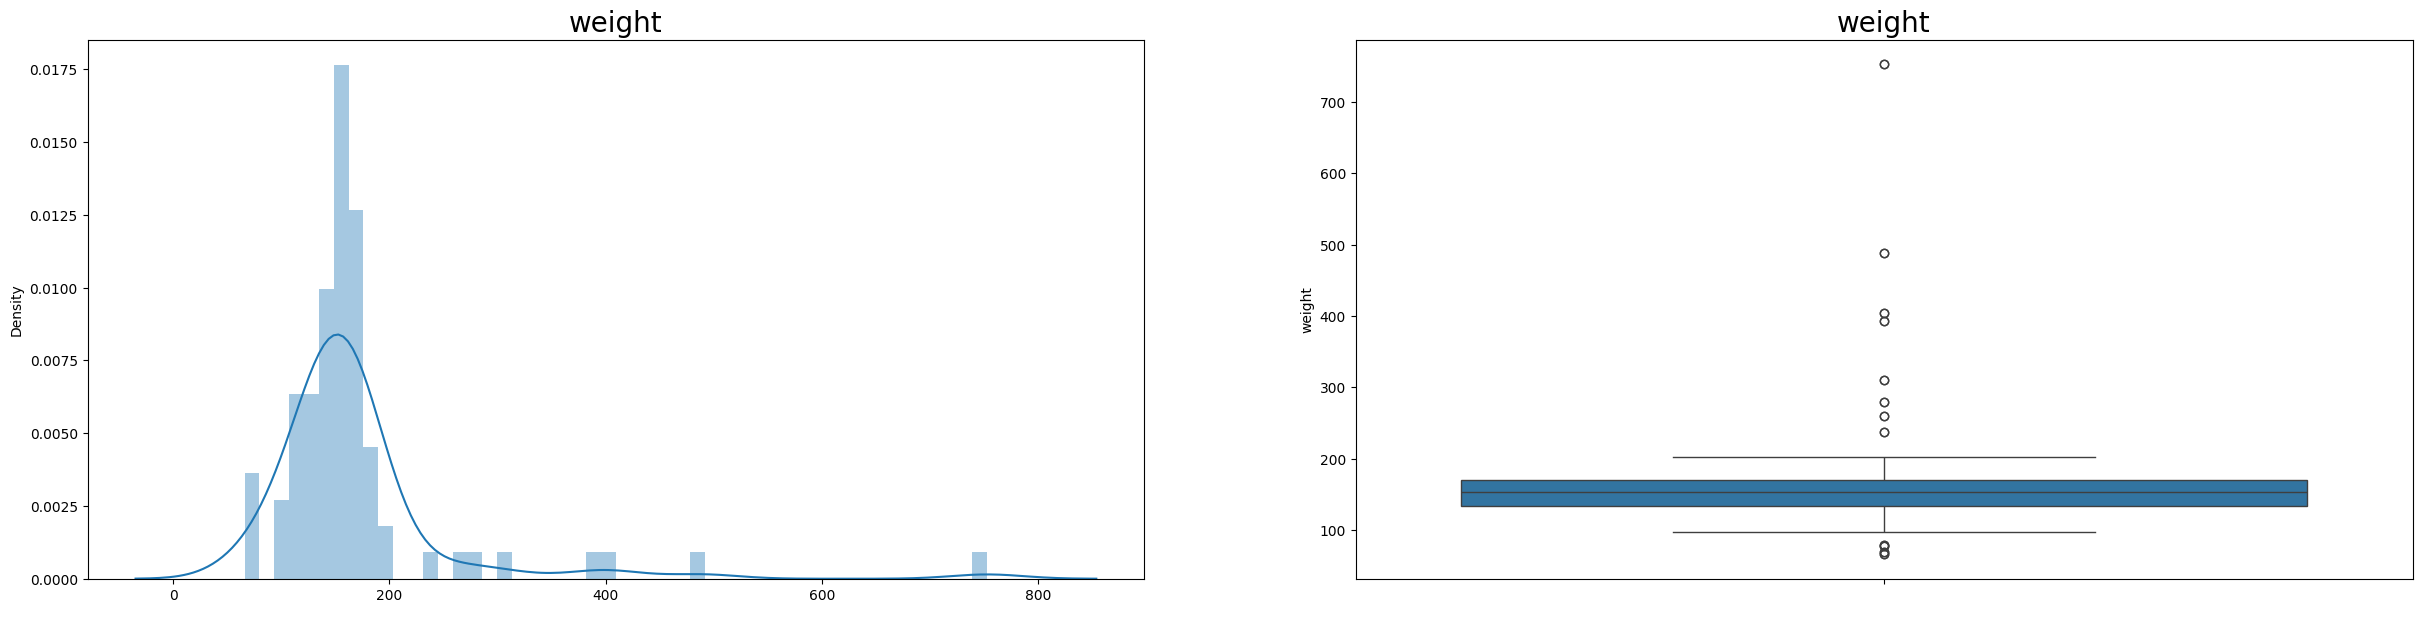

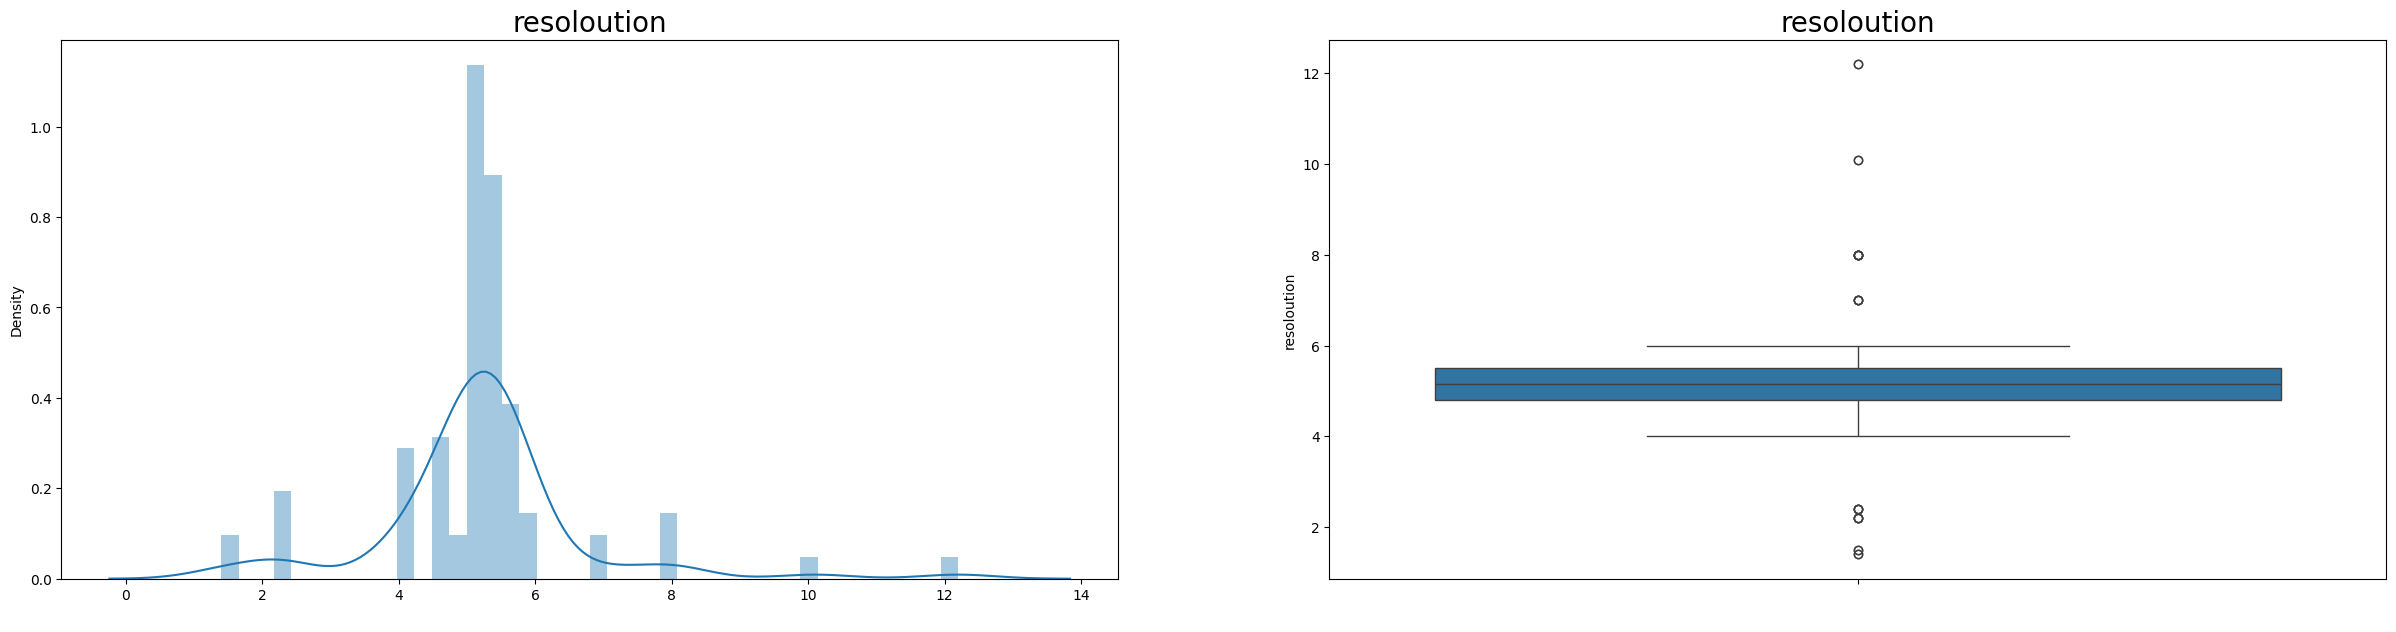

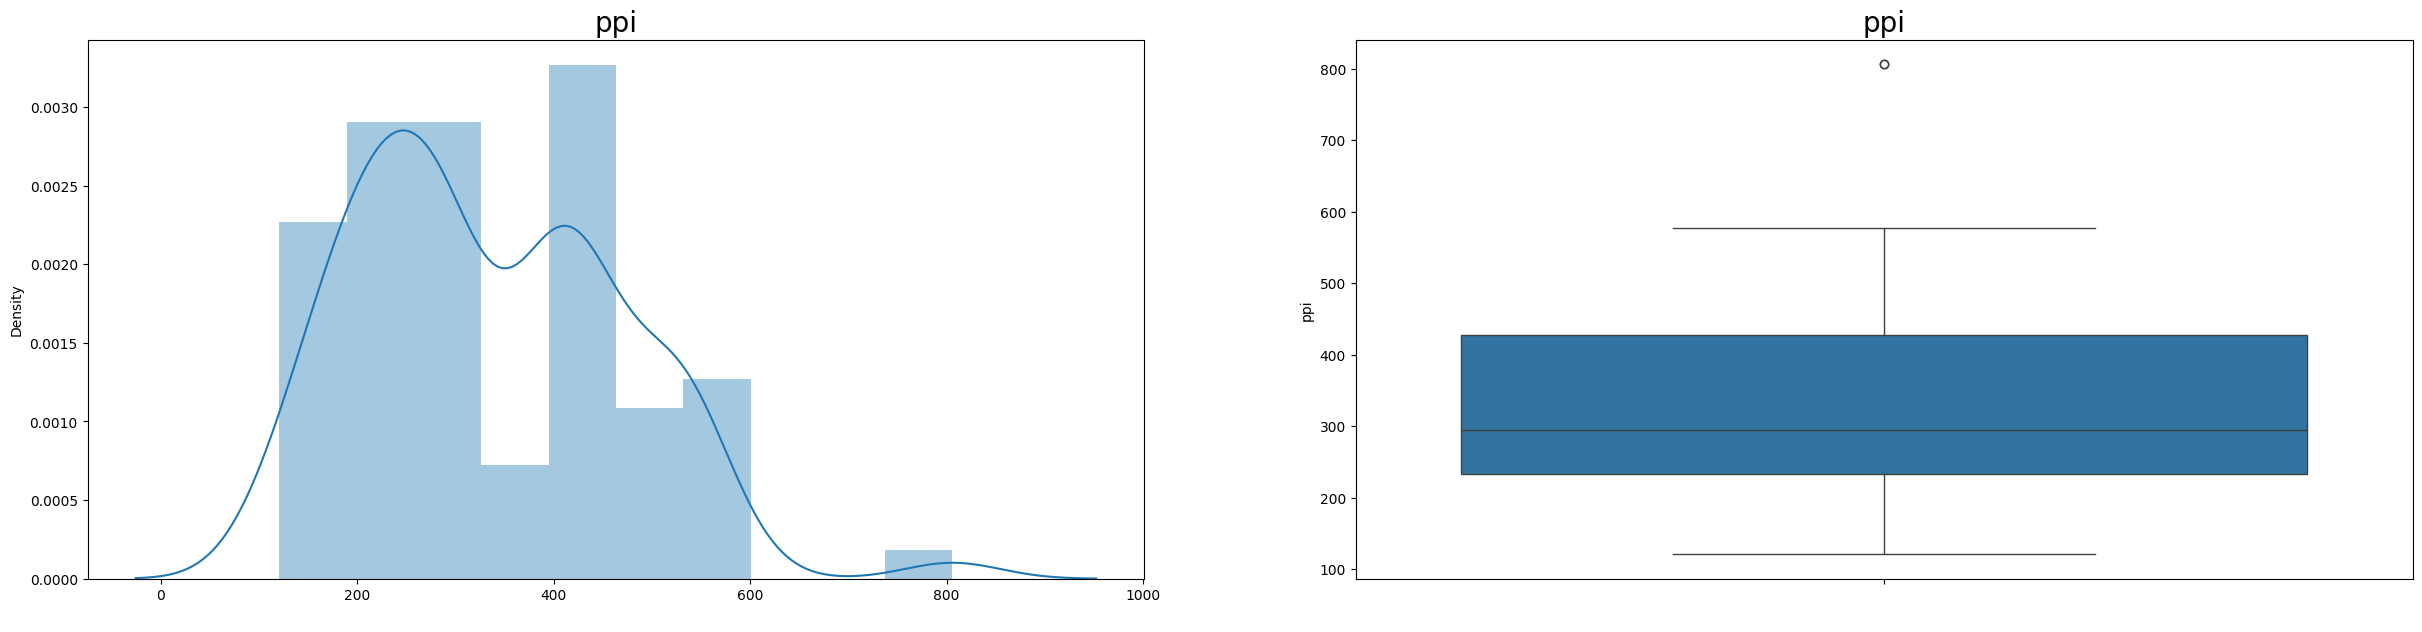

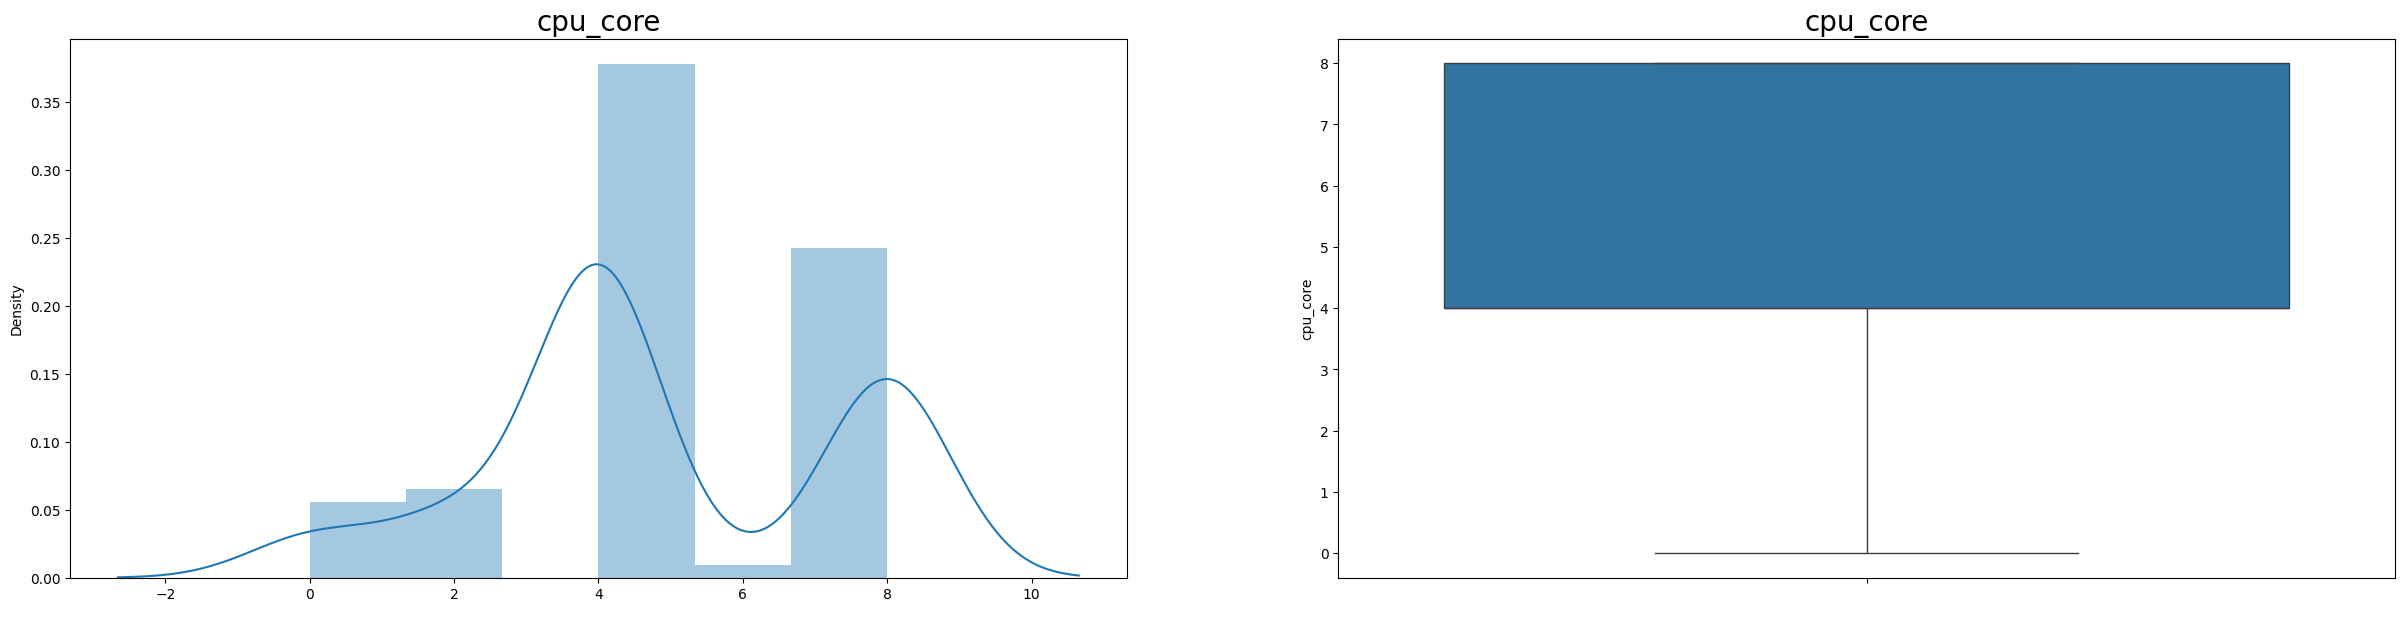

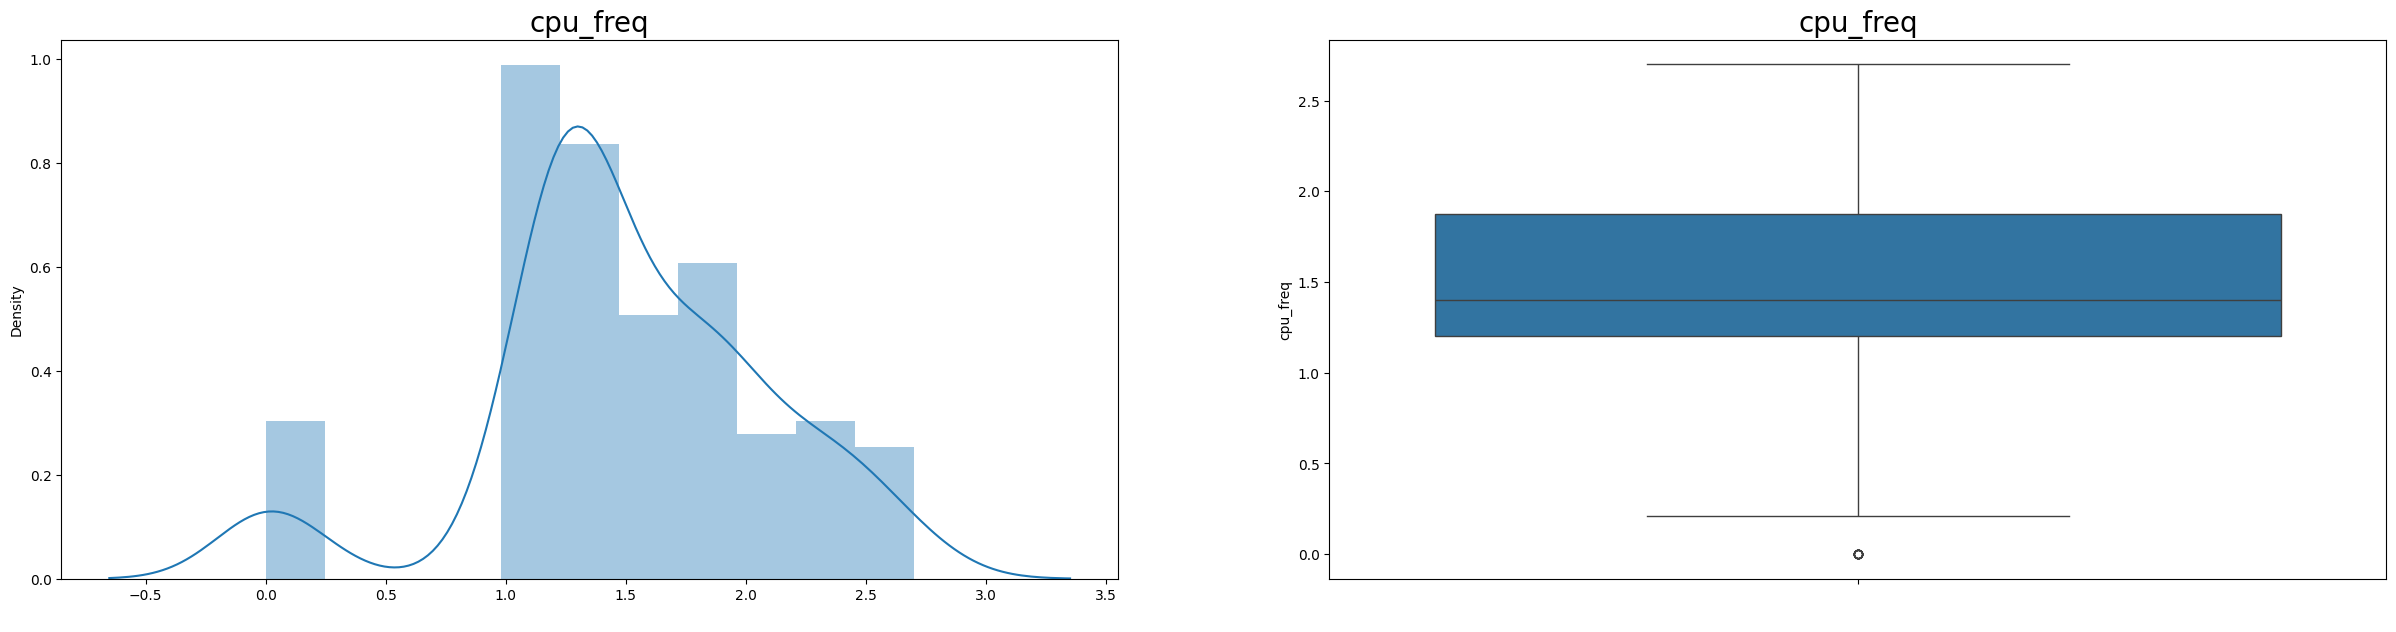

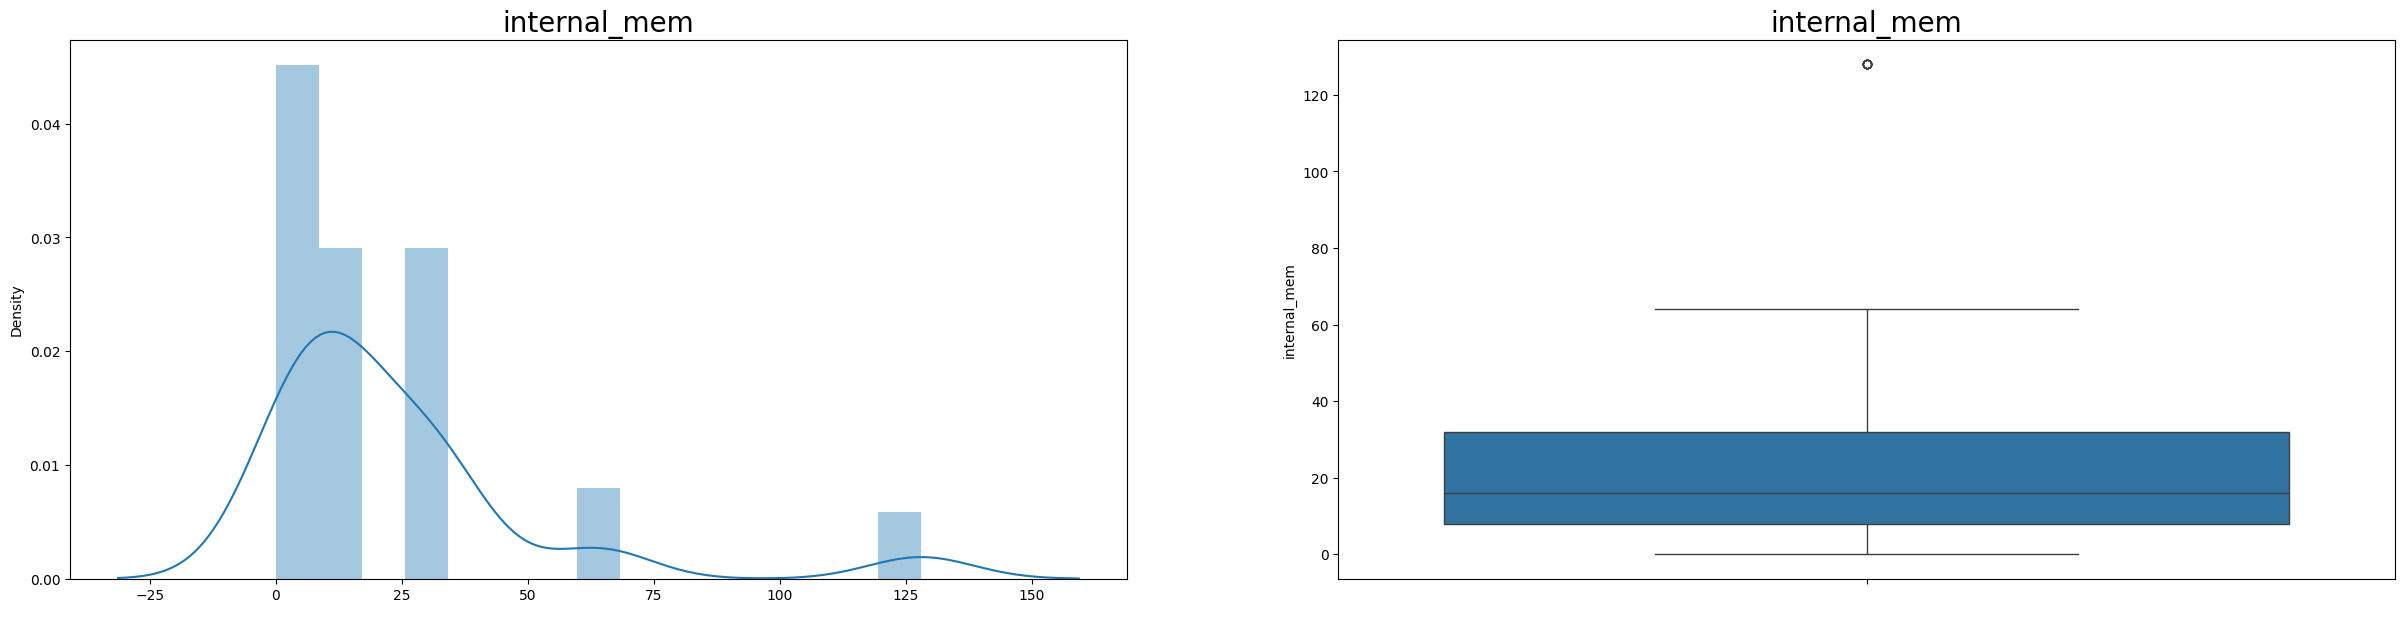

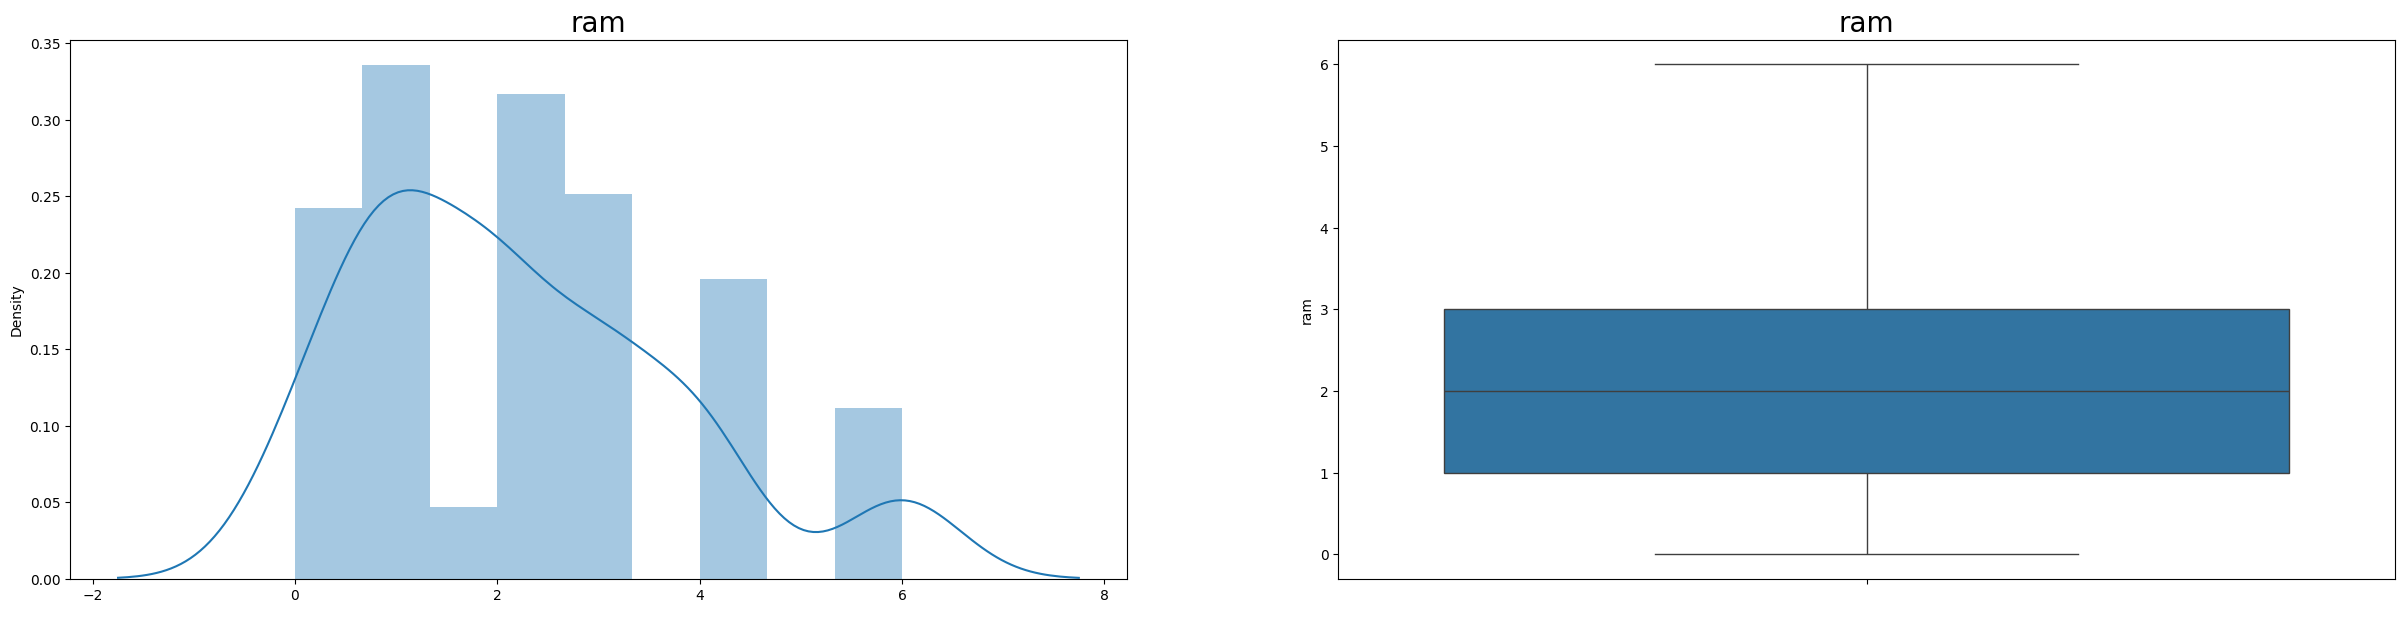

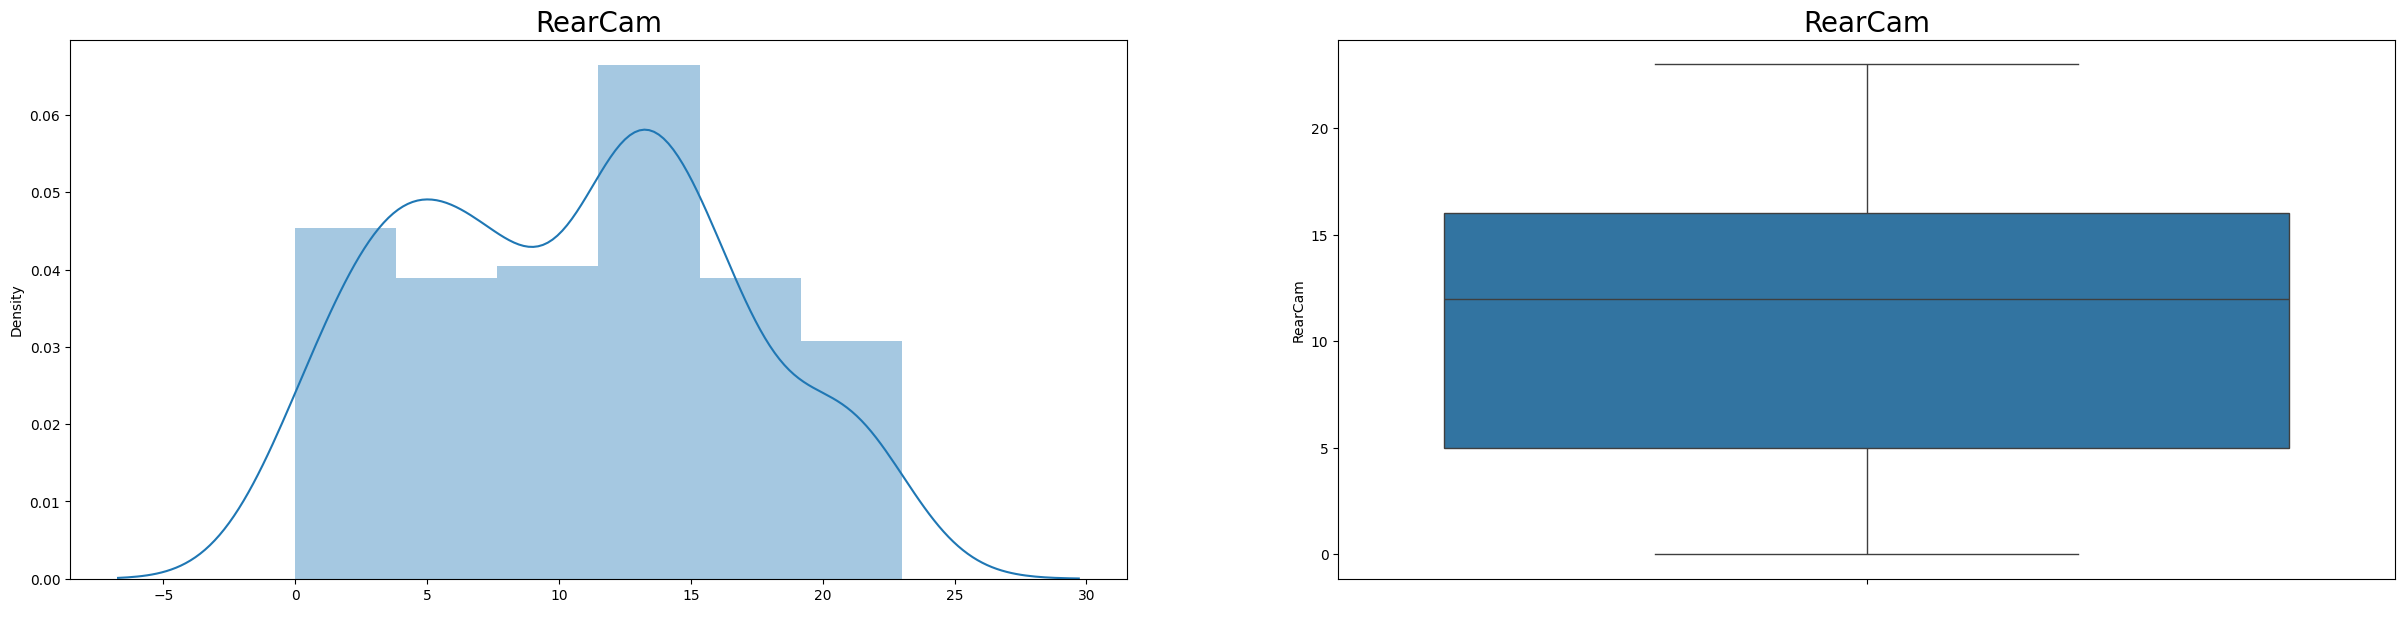

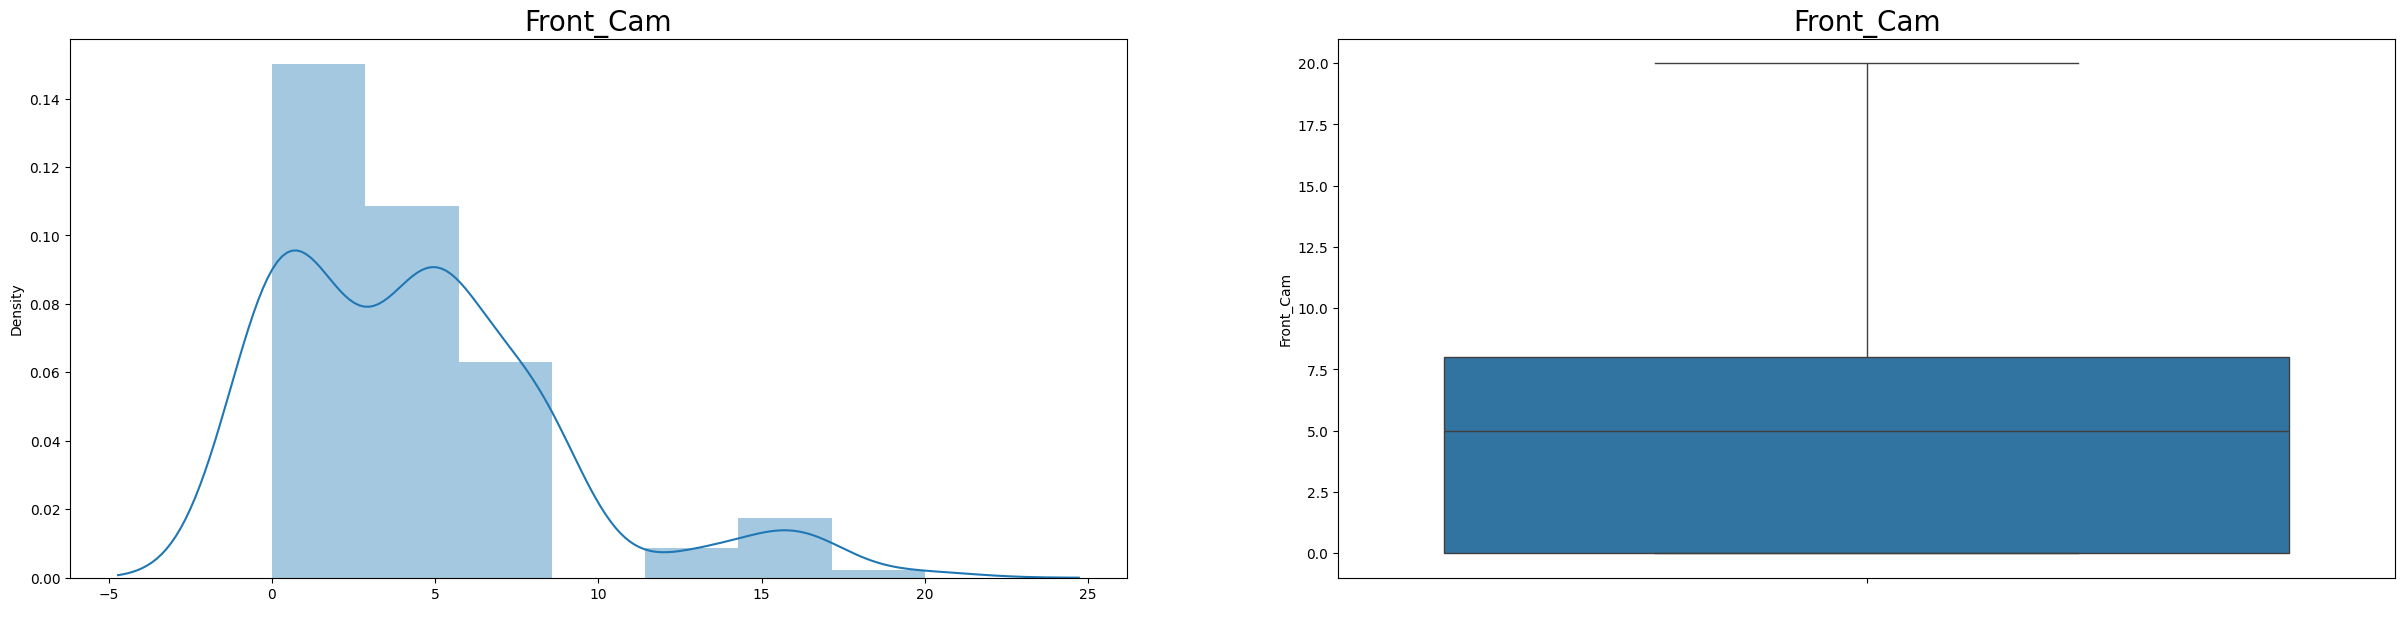

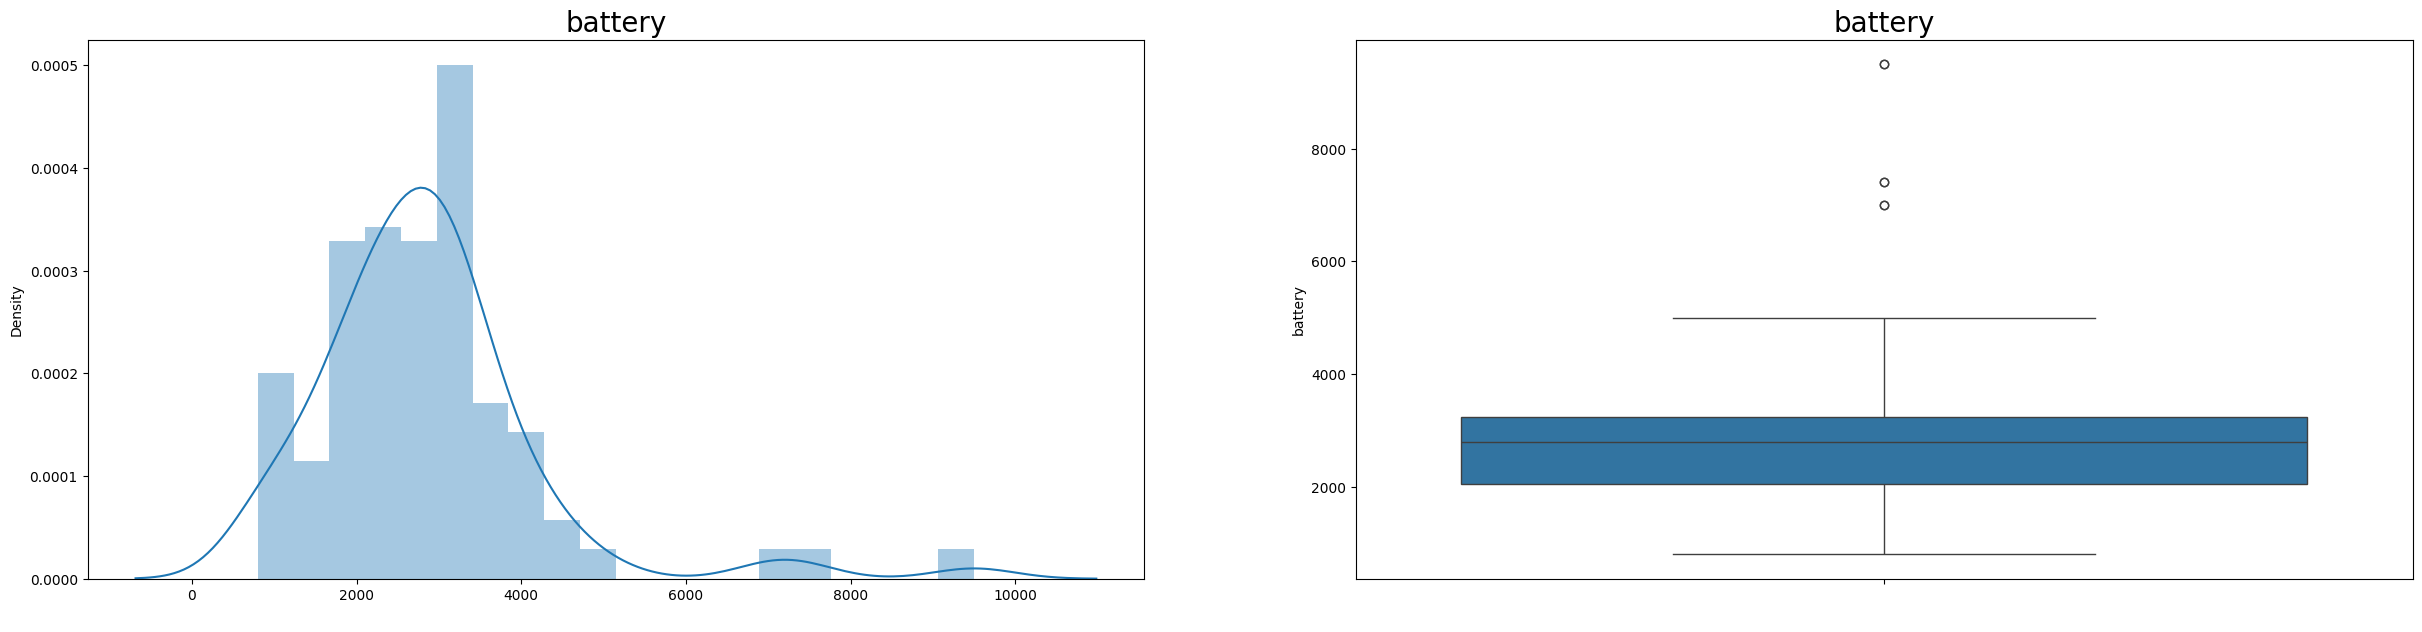

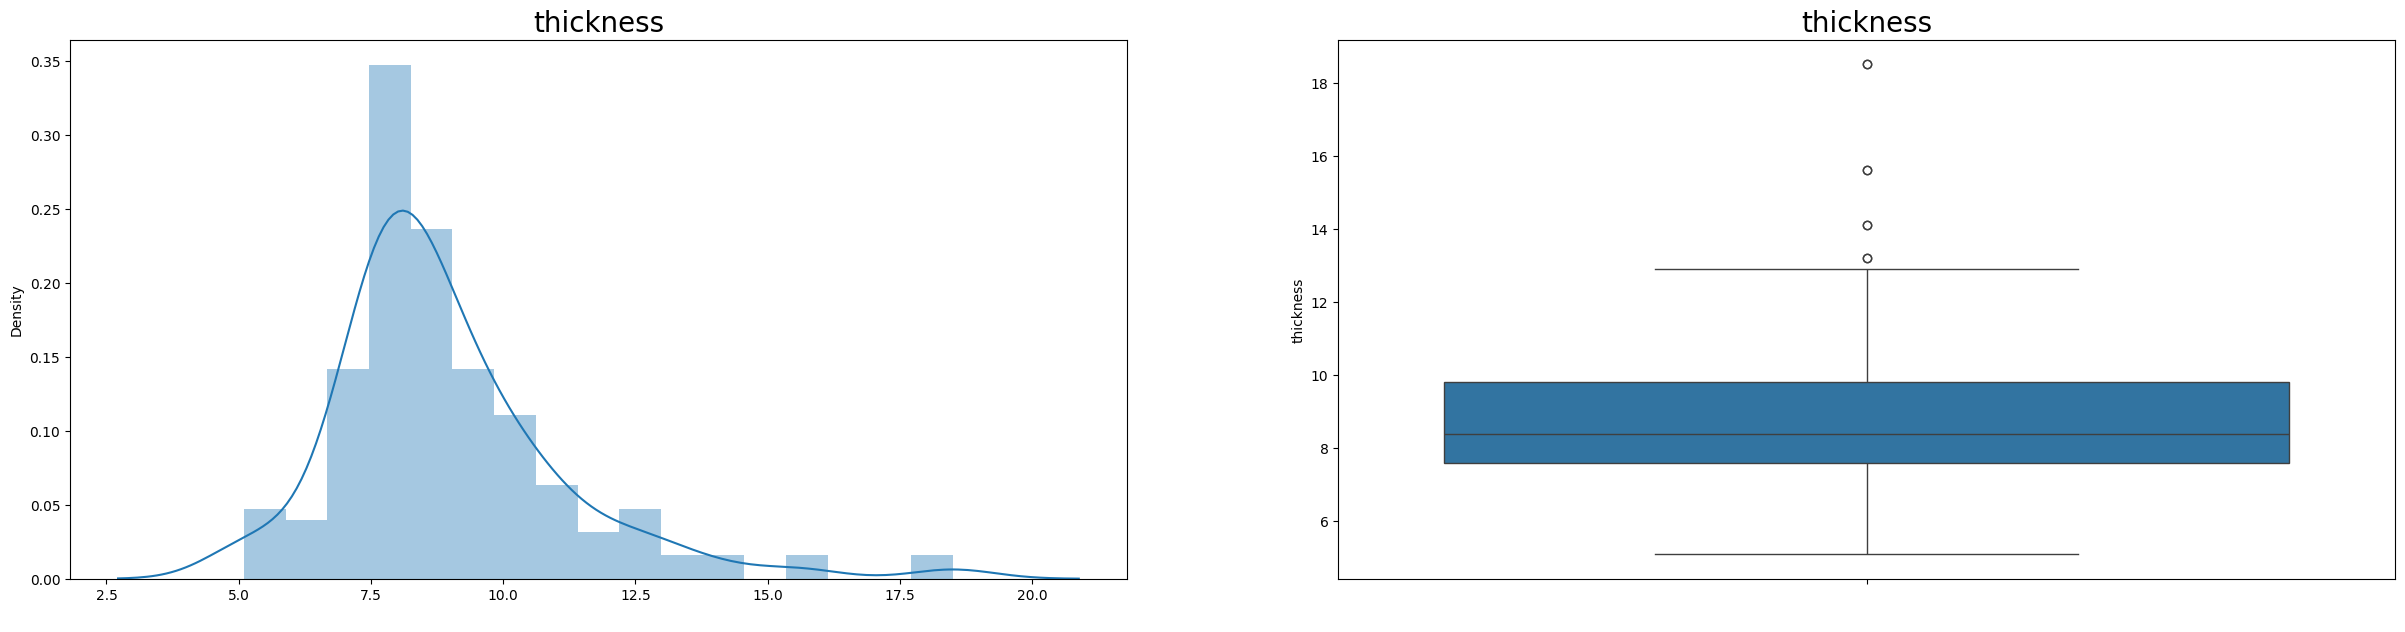

In [31]:
data1_columns = df.columns
data1_columns
# Gives us the distribution and boxplot for all the columns.
for index,col in enumerate(data1_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.xlabel(" ")
    plt.title(col, size = 20)
    
    plt.subplot(1,2,2)
    sns.boxplot(y = df[col])
    plt.title(col, size = 20)
    plt.show()

In [32]:
x = df.drop('Price', axis = 1)
y = df.Price

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [33]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)
lin_reg_model

LinearRegression()

In [34]:
y_pred_train = lin_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-Squared :",r_squared)

MSE : 26810.750231359772
RMSE: 163.73988589027346
MAE : 136.17846868302186
R-Squared : 0.9575438547474938


In [35]:
y_pred = lin_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r_squared = r2_score(y_test, y_pred)
print("R-Squared :",r_squared)

MSE : 28513.172200783894
RMSE: 168.8584383463968
MAE : 138.39445738857566
R-Squared : 0.9303123991399764


In [36]:
with open("linear_regression_model.pkl", 'wb') as f:
    pickle.dump(lin_reg_model,f)